- Geometric Operations,Scaling,Translation,Rotation,
- we will treat the image as a f(x,y),y is the vertical direction and x is horizontal or row direction.
- In a geometric transformation,we  change the coordinates of the image x and y, and produce g(y' ,x')
- Scaling is where we reshape the image,we can shrink or expand the image in horizontal or vertical direction.
- Interpolation is where we used neighbouring pixels to determine the value of an unknown pixel.
- Translation we can shift an image horizontally by adding the no of pixels 't x' then by mapping the location x prime

### Geometric Transformation
- Geometric trasformations allow you to perform different operations like translation, i.e shift,reshape and rotate the image.
- we can resize an image using the method resize() of PIL images,which takes the resized image's width and height as parameter.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
def plot_image(image1,image2,title1='original',title2='New Image'):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image1,cmap='gray')
    plt.title(title1)
    plt.subplot(1,2,2)
    plt.imshow(image2,cmap='gray')
    plt.title(title2)
    plt.show()

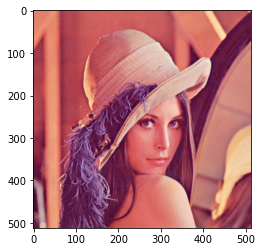

In [4]:
image=Image.open('lenna.png')
plt.imshow(image)
plt.show()

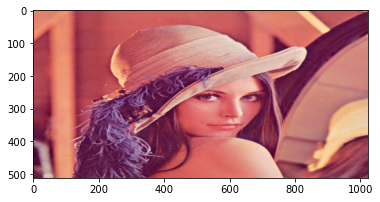

In [6]:
#we can scale horizontal axis by 2 and leave the vertical axis as is
width,height=image.size
new_width=2*width
new_height=height
new_image=image.resize((new_width,new_height))
plt.imshow(new_image)
plt.show()

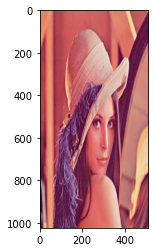

In [7]:
#In the same manner we can scale the vertical axis by 2
new_width=width
new_height=2*height
new_image=image.resize((new_width,new_height))
plt.imshow(new_image)
plt.show()

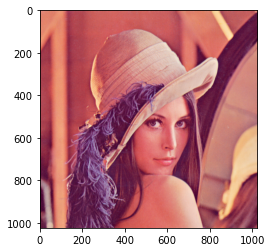

In [9]:
# we can double both the height and width of the image
new_width=2*width
new_height=2*height
new_image=image.resize((new_width,new_height))
plt.imshow(new_image)
plt.show()

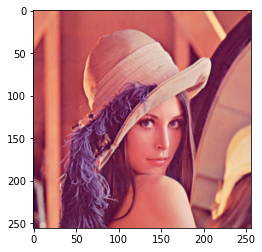

In [10]:
#we can shrink the image's width and height both by 1/2:
new_width=width//2
new_height=height//2
new_image=image.resize((new_width,new_height))
plt.imshow(new_image)
plt.show()

## Rotation 
- we can rotate image by angle theta,using the method rotate
- we can rotate our toy image by 45 degree

In [11]:
theta=45
new_image=image.rotate(theta)

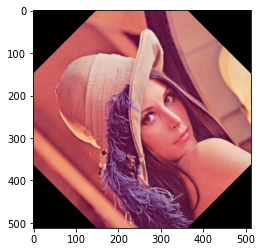

In [12]:
plt.imshow(new_image)
plt.show()

## Mathematical Operations
 - we can perform array operations on an image.Using python broadcasting,we can add a constant to each pixel's intensity value.
 - Before doing that, we must first convert PIL image to numpy array.
 

In [13]:
image=np.array(image)

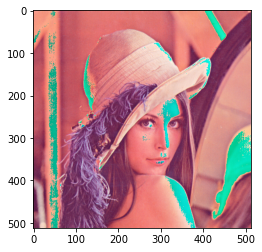

In [16]:
#we can then add the constant to the image array
new_image=image+20
plt.imshow(new_image)
plt.show()

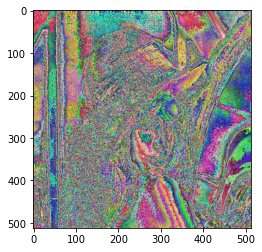

In [17]:
# we can also multiply every pixel's intensity value by a constant value.
new_image=10*image
plt.imshow(new_image)
plt.show()

- we can add the elements of two arrays of equal shape.In this example, we generate an array of random noises with the same shape and data type as our image.

In [19]:
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
Noise.shape
#here we are generating noise using normal distribution with a mean of 0 and standard deviation of 20. 
#The noise is generated in the shape of a 3 dimensional array with dimensions(height,width,3)


(512, 512, 3)

- standard deviation is often used to understand the spread or variability of a dataset. A smaller standard deviation indicates that the values in the dataset are closer to the mean,while a larger standard deviation suggests greater variability or dispersion of vallues from the mean

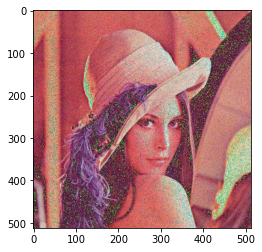

In [21]:
#we add the generated noise to the image and plot the result. we see the values that have corrupted the image
new_image=image+Noise
plt.imshow(new_image)
plt.show()

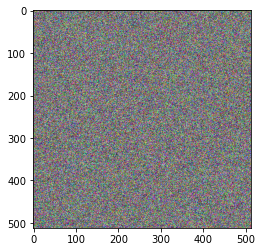

In [22]:
new_image=image*Noise
plt.imshow(new_image)
plt.show()

## Matrix Operations
- Grayscale images are matrices. Consider the following grayscale Image


In [23]:
im_gray=Image.open('barbara.png')

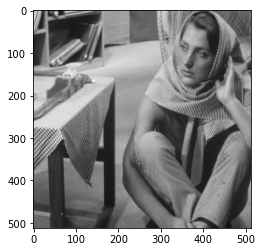

In [25]:
im_gray=im_gray.convert('RGB')
plt.imshow(im_gray)

In [26]:
from PIL import ImageOps

In [27]:
im_gray=ImageOps.grayscale(im_gray)

In [28]:
# we can convert the PIL image to a numpy array
im_gray=np.array(im_gray)

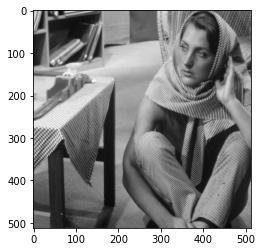

In [29]:
plt.imshow(im_gray,cmap='gray')
plt.show()

- we can apply algorithms designed for matrices. We can use singular value Decomposition, decomposing our image matrix into a product of three matrices.

In [30]:
U,s,V=np.linalg.svd(im_gray,full_matrices=True)

In [31]:
s.shape

(512,)

In [32]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

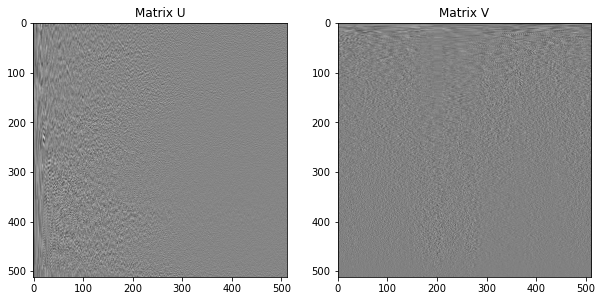

In [34]:
plot_image(U, V, title1="Matrix U", title2="Matrix V")

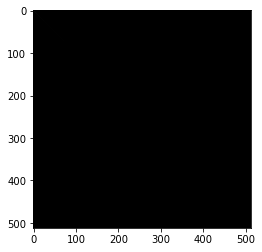

In [35]:
plt.imshow(S, cmap='gray')
plt.show()